# *TS6 - Respuesta en frecuencia de Filtros Pasivos RLC*

### Autoras: Catalina Gonzalez Araujo y Lola Pampin
### Docentes: Mariano Llamedo Soria, Francisco Hernan Ledesma y David Ezequiel Benoit

#### Fecha: 26/10/2025

# I. **Introducción**

## Función de Transferencia H(S)
Un sistema generalmente se puede caracterizar por su funcion transferencia H. La misma es una expresión matemática que caracteriza las relaciones de “Entrada – Salida” de sistemas LTI. Se define como la relación de la trasformada de Laplace de la salida (función respuesta), a la transformada de Laplace de la entrada (función excitadora). Dentro de este dominio la variable es s, pertenece a los complejos y se define $s= \theta +j\omega$. Trabajar en este dominio permite un analisis transitorio del regimen permanente, es decir, el analisis temporal.

$$
H(s) = \frac {Y(s)}{X(s)}
$$
O lo que es analogo, $Y(s)=H(s)X(s)$




Donde $\Omega_0$ es la *frecuencia natural o de resonancia*  descripta como 
$$
\Omega_0 = \frac {1}{\sqrt{LC}}
$$

## Factor de calidad (Q)
El factor de calidad Q de un filtro es una medida de la agudeza (selectividad) de la magnitud de la función de transferencia. Su definicion es:
$$
Q = \frac {1}{R} \sqrt {\frac {L}{C}}
$$

A mayor Q, la magnitud de la respuesta crece, es decir, el filtro se vuelve mas selectivo.




## Polos y ceros

## Respuesta en frecuencia - Diagrame de fase y respuesta de modulo

### Aproximaciones
### Retardo de fase

## Sección bicuadrática

Una sección bicuadrática (Second-Order Section, SOS) es un bloque de un sistema cuya función de transferencia tiene la forma de un cociente entre dos polinomios cuadráticos en la variable *s*. Es decir, es una estructura que representa un sistema de segundo orden (o la combinación de dos sistemas de segundo orden en cascada). La fórmula matemática que lo describe es:

$$
T(s) = k \cdot \frac{s^2 + \dfrac{\omega_z}{Q_z}s + \omega_z^2}{s^2 + \dfrac{\omega_p}{Q_p}s + \omega_p^2}
$$

Donde k representa la ganancia del sistema, $\omega_z$ y $\omega_p$ las frecuencias naturales asociadas a los ceros y polos, $Q_z$ y $Q_p$ los factores de calidad. El nombre del bloque se debe a que el numerador y el denominador son polinomios de segundo grado.

# II. **Desarrollo**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# %% PUNTO 1
# Hacemos un filtro pasa bajos

# Plantilla de diseño
wp = 1 # Frecuencia de corte/paso (rad/seg)
ws = 5 # Frecuencia de stop/detenida (rad/seg)

alpha_p = 1 # Atenuacion maxima a la wp, alfa_max, perdidas en banda de paso
alpha_s = 40 # Atenuacion minima a la ws, alfa_min, minima atenuacion requerida en banda de paso

# Aproximaciones de modulo
f_aprox_butter = 'butter'

# Diseño del filtro analogico
b, a = signal.iirdesign(wp = wp, ws = ws, gpass = alpha_p, gstop = alpha_s, analog = True, ftype = f_aprox_butter, output = 'ba')

# Matriz SOS
sos = signal.tf2sos(b, a, analog = True) # Ya me lo da en forma monica
# La raiz del ultimo valor del array me tiene que dar el radio 

print("\nMatriz SOS\n", sos); # Compruebo que es una seccion bicuadratica 




Matriz SOS
 [[0.         0.         1.96522673 1.         2.1877541  1.40186545]
 [0.         0.         1.         1.         0.90619742 1.40186545]]


In [7]:
# %% PUNTO 2
# Lo hago a mano, ya lo tengo anotado en mis apuntes pero lo tengo que poner prolijo 

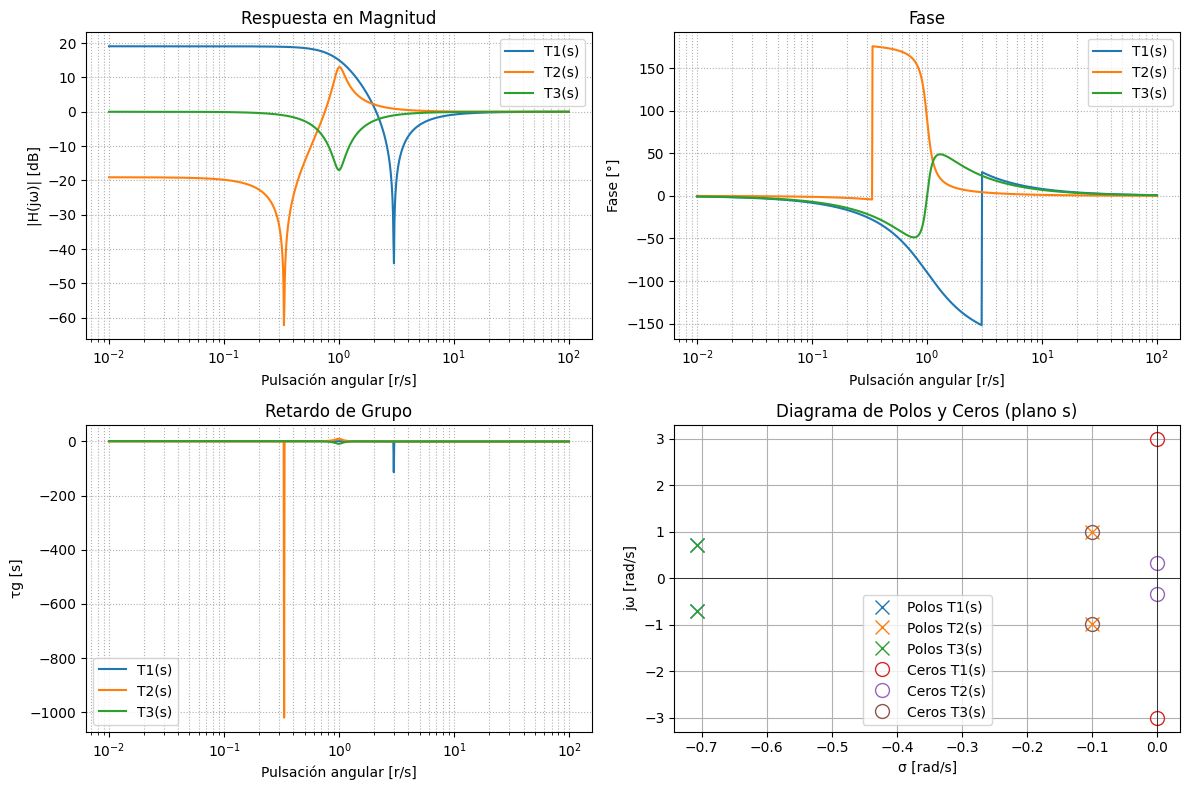

In [8]:
# %% PUNTO 3
# Defino las tres funciones de trasferencia que me da la consigna
# T1(s) = (s^2 + 9) / (s^2 + 2s + 1)
num1 = [1, 0, 9]
den1 = [1, np.sqrt(2), 1]
T1 = signal.TransferFunction(num1, den1)

# T2(s) = (s^2 + 1/9) / (s^2 + (1/5)s + 1)
num2 = [1, 0, 1/9]
den2 = [1, 1/5, 1]
T2 = signal.TransferFunction(num2, den2)

# T3(s) = (s^2 + s + 1) / (s^2 + 3s + 1)
num3 = [1, 1/5, 1]
den3 = [1, np.sqrt(2), 1]
T3 = signal.TransferFunction(num3, den3)

# Respuesta en frecuencia 
w = np.logspace(-2, 2, 1000) # Escala logaritmica 
w1, h1 = signal.freqs(num1, den1, w) # Calcula la respuesta en frecuencia del filtro
w2, h2 = signal.freqs(num2, den2, w) # Calcula la respuesta en frecuencia del filtro
w3, h3 = signal.freqs(num3, den3, w) # Calcula la respuesta en frecuencia del filtro

# Cálculo de fase
phase1 = np.unwrap(np.angle(h1))
phase2 = np.unwrap(np.angle(h2))
phase3 = np.unwrap(np.angle(h3))

# Retardo de grupo = -dφ/dω
gd1 = -np.diff(phase1) / np.diff(w1)
gd2 = -np.diff(phase2) / np.diff(w2)
gd3 = -np.diff(phase3) / np.diff(w3)

# Polos y ceros
z1, p1, k1 = signal.tf2zpk(num1, den1) # Nos devuelve la localizacion de los ceros 
z2, p2, k2 = signal.tf2zpk(num2, den2) # Nos devuelve la localizacion de los ceros 
z3, p3, k3 = signal.tf2zpk(num3, den3) # Nos devuelve la localizacion de los ceros 

# Graficos
plt.figure(figsize=(12,8))

# Magnitud
plt.subplot(2,2,1)
plt.semilogx(w1, 20*np.log10(abs(h1)), label = 'T1(s)')
plt.semilogx(w2, 20*np.log10(abs(h2)), label = 'T2(s)')
plt.semilogx(w3, 20*np.log10(abs(h3)), label = 'T3(s)')
plt.title('Respuesta en Magnitud')
plt.xlabel('Pulsación angular [r/s]')
plt.ylabel('|H(jω)| [dB]')
plt.grid(True, which = 'both', ls = ':')
plt.legend()

# Fase
plt.subplot(2,2,2)
plt.semilogx(w1, np.degrees(phase1), label = 'T1(s)')
plt.semilogx(w2, np.degrees(phase2), label = 'T2(s)')
plt.semilogx(w3, np.degrees(phase3), label = 'T3(s)')
plt.title('Fase')
plt.xlabel('Pulsación angular [r/s]')
plt.ylabel('Fase [°]')
plt.grid(True, which = 'both', ls = ':')
plt.legend()

# Retardo de grupo
plt.subplot(2,2,3)
plt.semilogx(w1[:-1], gd1, label = 'T1(s)')
plt.semilogx(w2[:-1], gd2, label = 'T2(s)')
plt.semilogx(w3[:-1], gd3, label = 'T3(s)')
plt.title('Retardo de Grupo')
plt.xlabel('Pulsación angular [r/s]')
plt.ylabel('τg [s]')
plt.grid(True, which = 'both', ls = ':')
plt.legend()

# Diagrama de polos y ceros
plt.subplot(2,2,4)
plt.plot(np.real(p1), np.imag(p1), 'x', markersize = 10, label = 'Polos T1(s)')
plt.plot(np.real(p2), np.imag(p2), 'x', markersize = 10, label = 'Polos T2(s)')
plt.plot(np.real(p3), np.imag(p3), 'x', markersize = 10, label = 'Polos T3(s)')

if len(z1) > 0:
    plt.plot(np.real(z1), np.imag(z1), 'o', markersize = 10, fillstyle = 'none', label = 'Ceros T1(s)')
if len(z2) > 0:
    plt.plot(np.real(z2), np.imag(z2), 'o', markersize = 10, fillstyle = 'none', label = 'Ceros T2(s)')
if len(z3) > 0:
    plt.plot(np.real(z3), np.imag(z3), 'o', markersize = 10, fillstyle = 'none', label = 'Ceros T3(s)')

plt.axhline(0, color = 'k', lw = 0.5)
plt.axvline(0, color='k', lw = 0.5)
plt.title('Diagrama de Polos y Ceros (plano s)')
plt.xlabel('σ [rad/s]')
plt.ylabel('jω [rad/s]')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()